<a href="https://colab.research.google.com/github/Wasid-Khan/ASP.NET-Core-Web-API-Development/blob/main/Stephan_Curry_The_outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Replacing text and saving the picture as output.png

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import cv2
import numpy as np

# Load the image
image = cv2.imread('cc2.jpg')

# Convert the image to RGB (OpenCV loads images in BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to a Pillow Image object
pil_image = Image.fromarray(image_rgb)

# Create a drawing object
draw = ImageDraw.Draw(pil_image)

# Use a default font available in Pillow
font = ImageFont.load_default()  # This will use a simple default font

# Define the text to replace and its position (tweak as necessary)
text = "DEVELOPER"
text_position = (130, 40)  # Adjust this position to match where "MASTER" is in the image

# Optional: Add a background rectangle to cover the old text (if needed)
# draw.rectangle([text_position, (300, 100)], fill=(0, 0, 0))blob:https://colab.research.google.com/ef40788f-8c20-4b81-8ce1-56d9862058f8

# Draw the new text over the image
draw.text(text_position, text, font=font, fill="white")

# Convert back to OpenCV format
image_final = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)

# Save the final image
cv2.imwrite('output.jpg', image_final)

print("The text has been replaced and the new image is saved as 'output.jpg'.")


The text has been replaced and the new image is saved as 'output.jpg'.


### Investigating, The NBA!

One of the most significant figures in the NBA is Stephen Curry – son of the famous Toronto Raptor player Dell Curry - whose efforts lead to the championship and final MVP award in the past season. while he is an outstanding player, there are talks that he is more than that and he managed to change the game of basketball with his courageous shooting attempts. So let’s see how data shows a correlation between his presence in the NBA and the dynamics of the league. Since we are already here, we do some other stuff alongside our objective.

## Part 1. Preprocessing the Data
We are going to work with players_stats_by_season_full_details.csv, the data includes player information on NBA (both regular season and playoffs) and international leagues per season starting from 1999-2000 season to 2019-2020 season. Fortunately, the variables are self-explanatory. We have 34 columns:

`League, Season, Season Stage, Player Name, Games Played, Total Minutes, Field Goal Mades, Field Goal Attempts, Three Pointer Mades, Three Pointer Attempts, Free Throw Mades, Free Throw Attempts, Turnovers, Personal Fauls, Offensive Rebounds, Defensive Rebounds, Total, Rebounds, Total Asists, Total Steals, Total Blocks, Total Points, Player Birth Year, Player Birth Month, Player Birth Date, Player Height in feet, Player Height in cm, Player Weight in lbs, Player Weight in kg, Player Nationality, Player High School, Player Draft Round, Player Draft Team`

Our objective is to analyze the NBA. We only consider the regular season because, in playoffs, teams do not follow the trends of the NBA. They adapt each other games through the series, and in if they win in the next series, everything, including playing types, shot selection, and so on, will change to be suitable for another series. In addition, the dataset did not provide per-game information. Since data is a little unbalanced within different seasons, using per-game stats would be way healthier anyway.

1. Proper importations.

    

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Reading the data from the .csv file and see the same columns and so on. playing with the data.

In [ ]:
import csv
import pandas as pd

# Read the CSV file into a list of dictionaries
with open('players_stats_by_season_full_details.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    data = list(reader)

# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(data)

# Display the first few rows to get an overview of the data
df.head()


,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
0,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79,3163.0,956,1665,0,...,"Mar 6, 1972",7-1,216,325,147,United States,Robert G. Cole High School,1,1,Orlando Magic
1,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,82,3126.0,788,1696,95,...,"Jan 26, 1977",6-6,198,220,100,United States,Mainland High School,1,5,Golden State Warriors
2,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,82,2947.0,752,1476,2,...,"Jul 24, 1963",6-9,206,265,120,United States,Summerfield High School,1,13,Utah Jazz
3,NBA,1999 - 2000,Regular_Season,Allen Iverson,PHI,70,2853.0,729,1733,89,...,"Jun 7, 1975",6-0,183,165,75,United States,Bethel High School,1,1,Philadelphia Sixers
4,NBA,1999 - 2000,Regular_Season,Gary Payton,SEA,82,3425.0,747,1666,177,...,"Jul 23, 1968",6-4,193,180,82,United States,Skyline High School,1,2,Seattle SuperSonics


In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('players_stats_by_season_full_details.csv')

# Display the first few rows to get an overview of the data
print("First few rows of the dataset:")
print(df.head())

# Display basic information about the DataFrame
print("\nBasic information about the DataFrame:")
print(df.info())

# Display summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df.describe())



First few rows of the dataset:
  League       Season           Stage            Player Team  GP     MIN  FGM  \
0    NBA  1999 - 2000  Regular_Season  Shaquille O'Neal  LAL  79  3163.0  956   
1    NBA  1999 - 2000  Regular_Season      Vince Carter  TOR  82  3126.0  788   
2    NBA  1999 - 2000  Regular_Season       Karl Malone  UTA  82  2947.0  752   
3    NBA  1999 - 2000  Regular_Season     Allen Iverson  PHI  70  2853.0  729   
4    NBA  1999 - 2000  Regular_Season       Gary Payton  SEA  82  3425.0  747   

    FGA  3PM  ...    birth_date  height  height_cm  weight  weight_kg  \
0  1665    0  ...   Mar 6, 1972     7-1      216.0   325.0      147.0   
1  1696   95  ...  Jan 26, 1977     6-6      198.0   220.0      100.0   
2  1476    2  ...  Jul 24, 1963     6-9      206.0   265.0      120.0   
3  1733   89  ...   Jun 7, 1975     6-0      183.0   165.0       75.0   
4  1666  177  ...  Jul 23, 1968     6-4      193.0   180.0       82.0   

     nationality                  high_scho

In [ ]:
# Display all column names
print("Column names in the DataFrame:")
print(df.columns.tolist())

# Check for missing values in each column
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

Column names in the DataFrame:
['League', 'Season', 'Stage', 'Player', 'Team', 'GP', 'MIN', 'FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'REB', 'AST', 'STL', 'BLK', 'PTS', 'birth_year', 'birth_month', 'birth_date', 'height', 'height_cm', 'weight', 'weight_kg', 'nationality', 'high_school', 'draft_round', 'draft_pick', 'draft_team']

Missing values in each column:
League             0
Season             0
Stage              0
Player             0
Team              11
GP                 0
MIN                0
FGM                0
FGA                0
3PM                0
3PA                0
FTM                0
FTA                0
TOV                0
PF                 0
ORB                0
DRB                0
REB                0
AST                0
STL                0
BLK                0
PTS                0
birth_year       318
birth_month      318
birth_date       318
height            74
height_cm         74
weight          4564
weight_kg       4564
n

In [ ]:
# Clean column names by stripping any leading or trailing whitespace
df.columns = df.columns.str.strip()

# Print out cleaned column names
print("Cleaned column names:")
print(df.columns)

# Filter the data to include only the regular season
df_regular_season = df[df['Stage'] == 'Regular']

# Display the first few rows of the filtered DataFrame
print("\nFirst few rows of the regular season data:")
print(df_regular_season.head())

# Display basic statistics for numerical columns in the regular season data
print("\nBasic statistics for numerical columns in the regular season data:")
print(df_regular_season.describe())

# Check data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Check unique values in the 'Stage' column
print("\nUnique values in the 'Stage' column:")
print(df['Stage'].unique())

# Check unique values in 'Season' and 'Stage'
print("\nUnique values in the 'Season' column:")
print(df['Season'].unique())

print("\nUnique values in the 'Stage' column:")
print(df['Stage'].unique())

Cleaned column names:
Index(['League', 'Season', 'Stage', 'Player', 'Team', 'GP', 'MIN', 'FGM',
       'FGA', '3PM', '3PA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'REB',
       'AST', 'STL', 'BLK', 'PTS', 'birth_year', 'birth_month', 'birth_date',
       'height', 'height_cm', 'weight', 'weight_kg', 'nationality',
       'high_school', 'draft_round', 'draft_pick', 'draft_team'],
      dtype='object')

First few rows of the regular season data:
Empty DataFrame
Columns: [League, Season, Stage, Player, Team, GP, MIN, FGM, FGA, 3PM, 3PA, FTM, FTA, TOV, PF, ORB, DRB, REB, AST, STL, BLK, PTS, birth_year, birth_month, birth_date, height, height_cm, weight, weight_kg, nationality, high_school, draft_round, draft_pick, draft_team]
Index: []

[0 rows x 34 columns]

Basic statistics for numerical columns in the regular season data:
        GP  MIN  FGM  FGA  3PM  3PA  FTM  FTA  TOV   PF  ...  AST  STL  BLK  \
count  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
mean   

3. add new columns including per game stats for example create `PPG` column using the two existing columns `PTS` and `GP`. You should do that for `MIN`, `TOV`, `3PA`, `FGA`, `FGM` and `PF` as well!
Suggested name for the new variables are `PPG`, `MPG`, `TOVPG`, `3PAPG`, `3PMPG`, `FGAPG`,`FGMPG`, `FPG`

In [ ]:
# Ensure that all columns involved in calculations are present and have valid data
required_columns = ['PTS', 'GP', 'MIN', 'TOV', '3PA', 'FGA', 'FGM', 'PF']
for col in required_columns:
    if col not in df.columns:
        raise KeyError(f"Column '{col}' not found in DataFrame")

# Create new columns for per-game stats
df['PPG'] = df['PTS'] / df['GP']  # Points per game
df['MPG'] = df['MIN'] / df['GP']  # Minutes per game
df['TOVPG'] = df['TOV'] / df['GP']  # Turnovers per game
df['3PAPG'] = df['3PA'] / df['GP']  # Three-point attempts per game
df['3PMPG'] = df['3PM'] / df['GP']  # Three-point makes per game
df['FGAPG'] = df['FGA'] / df['GP']  # Field goal attempts per game
df['FGMPG'] = df['FGM'] / df['GP']  # Field goals made per game
df['FPG'] = df['PF'] / df['GP']  # Personal fouls per game

# Display the first few rows to verify the new columns
print("\nFirst few rows with per-game statistics:")
print(df[['PPG', 'MPG', 'TOVPG', '3PAPG', '3PMPG', 'FGAPG', 'FGMPG', 'FPG']].head())



First few rows with per-game statistics:
         PPG        MPG     TOVPG     3PAPG     3PMPG      FGAPG      FGMPG  \
0  29.670886  40.037975  2.822785  0.012658  0.000000  21.075949  12.101266   
1  25.695122  38.121951  2.170732  2.878049  1.158537  20.682927   9.609756   
2  25.548780  35.939024  2.817073  0.097561  0.024390  18.000000   9.170732   
3  28.414286  40.757143  3.285714  3.728571  1.271429  24.757143  10.414286   
4  24.170732  41.768293  2.731707  6.341463  2.158537  20.317073   9.109756   

        FPG  
0  3.227848  
1  3.207317  
2  2.792683  
3  2.314286  
4  2.170732  


4. print out all the unique values of the leagues in the dataset

In [ ]:
# Print out all unique values in the 'League' column
unique_leagues = df['League'].unique()
print("Unique values in 'League' column:")
for league in unique_leagues:
    print(league)

Unique values in 'League' column:
NBA
Euroleague
Eurocup
Australian-NBL
German-BBL
Italian-Lega-Basket-Serie-A
Spanish-ACB
French-Jeep-Elite
Argentinian-Liga-A
Austrian-A-Bundesliga
Balkan-BIL
Belarusian-BPL
Belgium-Scooore-League
Bosnian-BiH-Liga
Brazilian-NBB
British-BBL
Bulgarian-NBL
Canadian-NBL
Chinese-CBA
Croatian-A-1-Liga
Czech-NBL
Danish-Basketligaen
Finnish-Korisliiga
Greek-HEBA-A1
Hungarian-NBIA
Israeli-BSL
Lithuanian-LKL
Macedonian-Superleague
Mexican-LNBP
Netherlands-DBL
New-Zealand-NBL
Norwegian-BLNO
Polish-TBL
Romanian-Divizia-A
Serbian-KLS
Slovakian-Extraliga
Slovenian-SKL
South-Korean-KBL
Swedish-Basketligan
Swiss-LNA
Turkish-BSL
Ukrainian-Superleague
Georgian-Super-Liga
Lebanese-Division-A
Luxembourg-Total-League
FIBA-Europe-Cup
Japanese-BLeague
Kosovo-FBK
Estonian-Latvian-Basketball-League


5. Filter the df so that we have a data of only NBA:

In [ ]:
# Filter the DataFrame to include only rows where the 'League' is 'NBA'
df_nba = df[df['League'] == 'NBA']

# Display the first few rows of the filtered DataFrame to confirm
print("First few rows of the DataFrame with 'League' as 'NBA':")
print(df_nba.head())

First few rows of the DataFrame with 'League' as 'NBA':
  League       Season           Stage            Player Team  GP     MIN  FGM  \
0    NBA  1999 - 2000  Regular_Season  Shaquille O'Neal  LAL  79  3163.0  956   
1    NBA  1999 - 2000  Regular_Season      Vince Carter  TOR  82  3126.0  788   
2    NBA  1999 - 2000  Regular_Season       Karl Malone  UTA  82  2947.0  752   
3    NBA  1999 - 2000  Regular_Season     Allen Iverson  PHI  70  2853.0  729   
4    NBA  1999 - 2000  Regular_Season       Gary Payton  SEA  82  3425.0  747   

    FGA  3PM  ...  draft_pick             draft_team        PPG        MPG  \
0  1665    0  ...         1.0          Orlando Magic  29.670886  40.037975   
1  1696   95  ...         5.0  Golden State Warriors  25.695122  38.121951   
2  1476    2  ...        13.0              Utah Jazz  25.548780  35.939024   
3  1733   89  ...         1.0    Philadelphia Sixers  28.414286  40.757143   
4  1666  177  ...         2.0    Seattle SuperSonics  24.170732  41

*True Shooting Percentage (TS%)* is a statistic used in basketball to measure a player's efficiency at shooting the ball. It considers field goals, 3-point field goals, and free throws, providing a comprehensive view of a player's shooting performance. Unlike traditional shooting percentages that only consider field goals, TS% includes the impact of 3-pointers and the effectiveness at the free-throw line. This makes it a valuable metric for evaluating the true scoring efficiency of players.

Formula:
$$\text{TS\%} = \frac{\text{Points}}{2 \times (\text{Field Goal Attempts} + 0.44 \times \text{Free Throw Attempts})}$$

Calculate the True Shooting Percentage (TS%) for each NBA player per season, focusing specifically on those with at least 1000 combined field goal and free throw attempts in a season. This threshold ensures that the evaluation is restricted to players who have a significant shooting volume, thus providing a reliable measure of shooting efficiency.

Instructions:

 1. Aggregate the data for each `Player` for each `Season` to sum up the total points (PTS), field goal attempts (FGA), and free throw attempts (FTA).
 2. Implement and apply a function to calculate TS%, considering only those player-season records that meet the attempt threshold.
 3. Sort the results to identify the top players based on their TS% and display these top results.

6. Now let’s deal with some missing values. Impute the `NaN` values in `birth_year`, `weight_kg` and `heigh_cm` columns using the `mean()` of all the data in that column.

In [ ]:
# Calculate the mean of each column
mean_birth_year = df['birth_year'].mean()
mean_weight_kg = df['weight_kg'].mean()
mean_height_cm = df['height_cm'].mean()

# Impute missing values with the calculated mean
df['birth_year'].fillna(mean_birth_year, inplace=True)
df['weight_kg'].fillna(mean_weight_kg, inplace=True)
df['height_cm'].fillna(mean_height_cm, inplace=True)

# Verify the imputation by checking for any remaining NaN values
missing_values_after_imputation = df[['birth_year', 'weight_kg', 'height_cm']].isnull().sum()
print("Missing values after imputation:")
print(missing_values_after_imputation)

# Explanation of the Result:
# Imputation Success: If missing_values_after_imputation shows 0 for all columns, it indicates that all NaN values have been successfully filled with the mean of their respective columns.
# No Missing Values: A count of 0 means there are no remaining missing values in birth_year, weight_kg, or height_cm after performing the imputation.

Missing values after imputation:
birth_year    0
weight_kg     0
height_cm     0
dtype: int64


7. Now let’s create an age column you can do that using apply with the following function
```
    def calculate_age(row):
    # Extract the starting year of the season and subtract the birth year
    try:
        season_start_year = int(row['Season'][0:4])  # Takes the first four characters and converts to integer
        birth_year = int(row['birth_year'])
        return season_start_year - birth_year
    except ValueError:
        return None  # Return None or a suitable value if there's an error
```

In [ ]:
# Defining the function to calculate age
def calculate_age(row):
    # Extract the starting year of the season and subtract the birth year
    try:
        season_start_year = int(row['Season'][:4])  # Takes the first four characters and converts to integer
        birth_year = int(row['birth_year'])
        return season_start_year - birth_year
    except ValueError:
        return None  # Return None or a suitable value if there's an error

# Apply the function to each row and create the 'age' column
df['age'] = df.apply(calculate_age, axis=1)

# Display the first few rows to verify the new 'age' column
print("First few rows with 'age' column:")
print(df[['Season', 'birth_year', 'age']].head(10))

First few rows with 'age' column:
        Season  birth_year  age
0  1999 - 2000      1972.0   27
1  1999 - 2000      1977.0   22
2  1999 - 2000      1963.0   36
3  1999 - 2000      1975.0   24
4  1999 - 2000      1968.0   31
5  1999 - 2000      1974.0   25
6  1999 - 2000      1972.0   27
7  1999 - 2000      1976.0   23
8  1999 - 2000      1973.0   26
9  1999 - 2000      1973.0   26


8. Also drop the 'birth_year' we don’t need it anymore.

In [ ]:
# Define the function to calculate age
def calculate_age(row):
    # Extract the starting year of the season and subtract the birth year
    try:
        season_start_year = int(row['Season'][:4])  # Takes the first four characters and converts to integer
        birth_year = int(row['birth_year'])
        return season_start_year - birth_year
    except ValueError:
        return None  # Return None or a suitable value if there's an error

# Apply the function to each row and create the 'age' column
df['age'] = df.apply(calculate_age, axis=1)

# Drop the 'birth_year' column as it's no longer needed
df.drop(columns=['birth_year'], inplace=True)

# Display the first few rows to verify the new 'age' column and the removal of 'birth_year'
print("First few rows with 'age' column and without 'birth_year':")
print(df[['Season', 'age']].head(10))

First few rows with 'age' column and without 'birth_year':
        Season  age
0  1999 - 2000   27
1  1999 - 2000   22
2  1999 - 2000   36
3  1999 - 2000   24
4  1999 - 2000   31
5  1999 - 2000   25
6  1999 - 2000   27
7  1999 - 2000   23
8  1999 - 2000   26
9  1999 - 2000   26


9. Extract just NBA regular season from the data and update your data frame with extracted data. As we said, we don’t need the rest of it!. (Hint: remember how we extracted wines from specific countries in the class? `loc` command can be very useful!)

In [ ]:
# Extract only NBA regular season data
df_nba_regular_season = df.loc[(df['League'] == 'NBA') & (df['Stage'] == 'Regular')]

# Update the DataFrame with the extracted data
df = df_nba_regular_season

# Display the first few rows to verify the DataFrame now contains only NBA regular season data
print("First few rows of the NBA regular season data:")
print(df.head())

First few rows of the NBA regular season data:
Empty DataFrame
Columns: [League, Season, Stage, Player, Team, GP, MIN, FGM, FGA, 3PM, 3PA, FTM, FTA, TOV, PF, ORB, DRB, REB, AST, STL, BLK, PTS, birth_month, birth_date, height, height_cm, weight, weight_kg, nationality, high_school, draft_round, draft_pick, draft_team, PPG, MPG, TOVPG, 3PAPG, 3PMPG, FGAPG, FGMPG, FPG, age]
Index: []

[0 rows x 42 columns]


## Part 2. General NBA analysis!

Now let’s perform the first set of analysis. Before we go on about the game stats let’s see how general trends such as weights, age, minutes played per game, etc., has changed. for the __Part 2__:


Before we dive into the details of Stephen Curry’s remarkable shooting skills, let's explore who the best shooters in the NBA are by using an advanced metric called True Shooting Percentage (TS%). This statistic provides a more accurate measure of a player's efficiency by considering all forms of scoring from the field, making it ideal for comparing players across different eras and styles.

**True Shooting Percentage (TS%)** is a statistic used in basketball to measure a player's efficiency at shooting the ball. It considers field goals, 3-point field goals, and free throws, providing a comprehensive view of a player's shooting performance. Unlike traditional shooting percentages that only consider field goals, TS% includes the impact of 3-pointers and the effectiveness at the free-throw line. This makes it a valuable metric for evaluating the true scoring efficiency of players.

Formula:
$$\text{TS\%} = \frac{\text{Points}}{2 \times (\text{Field Goal Attempts} + 0.44 \times \text{Free Throw Attempts})}$$

Calculate the True Shooting Percentage (TS%) for each NBA player per season, focusing specifically on those with at least 1000 combined field goal and free throw attempts in a season. This threshold ensures that the evaluation is restricted to players who have a significant shooting volume, thus providing a reliable measure of shooting efficiency.

Instructions:

1. **Aggregate Player Data:** Group the player data by 'Player' and 'Season'. Summarize the total points (PTS), field goal attempts (FGA), and free throw attempts (FTA) for each player-season combination.
2. **Calculate TS%:** Implement a function to calculate TS%, but ensure it only processes records where the combined total of FGA and FTA meets or exceeds 1000. This filter excludes players with insufficient shooting volume, which might otherwise skew the analysis. Consider cases where the calculated denominator might be zero and handle these appropriately to avoid division errors.
* Utilize the apply() function to compute the True Shooting Percentage and store your results in a new DataFrame named player_season_stats. Ensure your calculations are based on original columns eg. field goal attempts (FGA), not field goal attempts per game (FGAPG). The final DataFrame should include the following columns: Player, Season, PTS, FGA, FTA, and TS%
3. **Sort and Display Results:** Sort the resulting data by TS% in descending order to find the top shooters. Display the top 10 players to see who leads in shooting efficiency.

In [ ]:
import pandas as pd

# Load the data
file_path = 'players_stats_by_season_full_details.csv'
df = pd.read_csv(file_path)

# Inspect the first few rows to ensure the data is loaded correctly
print("Initial DataFrame (first 10 rows):")
print(df.head(10))

# Check for any missing values
print("\nMissing Values in DataFrame:")
print(df.isna().sum())

# Verify column names
print("\nColumn Names:")
print(df.columns)

# Ensure the necessary columns are in the DataFrame
required_columns = ['Player', 'Season', 'PTS', 'FGA', 'FTA']
print("\nChecking for required columns:")
print(all(col in df.columns for col in required_columns))

# Convert relevant columns to numeric
df['FGA'] = pd.to_numeric(df['FGA'], errors='coerce')
df['FTA'] = pd.to_numeric(df['FTA'], errors='coerce')

# Check data types after conversion
print("\nConverted Data Types:")
print(df[['FGA', 'FTA']].dtypes)

# Aggregate data for each player per season
player_season_stats = df.groupby(['Player', 'Season']).agg({
    'PTS': 'sum',
    'FGA': 'sum',
    'FTA': 'sum'
}).reset_index()

# Calculate the total attempts
player_season_stats['Total_Attempts'] = player_season_stats['FGA'] + 0.44 * player_season_stats['FTA']

# Print aggregated data to check before filtering
print("\nAggregated Player Season Stats (First 10 rows):")
print(player_season_stats.head(10))

# Check the range of total attempts to understand the distribution
print("\nSummary Statistics for Total_Attempts:")
print(player_season_stats['Total_Attempts'].describe())

# Filter out records with less than 1000 total attempts
player_season_stats_filtered = player_season_stats[player_season_stats['Total_Attempts'] >= 1000]

# Print filtered data to check if there are any records left
print("\nFiltered Player Season Stats (Total_Attempts >= 1000):")
print(player_season_stats_filtered.head(10))

# Check the number of records after filtering
print(f"\nNumber of records after filtering: {player_season_stats_filtered.shape[0]}")

# Calculate TS%
def calculate_ts(row):
    try:
        # Calculate TS% using the formula
        ts_percentage = (row['PTS'] / (2 * (row['FGA'] + 0.44 * row['FTA']))) * 100
        return ts_percentage
    except ZeroDivisionError:
        return 0  # Handle cases where denominator is zero

# Apply the function to calculate TS%
player_season_stats_filtered['TS%'] = player_season_stats_filtered.apply(calculate_ts, axis=1)

# Sort by TS% in descending order and display the top results
top_ts_players = player_season_stats_filtered.sort_values(by='TS%', ascending=False)

# Display the top 10 players based on TS%
print("\nTop 10 Players by TS%:")
print(top_ts_players[['Player', 'Season', 'PTS', 'FGA', 'FTA', 'TS%']].head(10))


Initial DataFrame (first 10 rows):
  League       Season           Stage            Player Team  GP     MIN  FGM  \
0    NBA  1999 - 2000  Regular_Season  Shaquille O'Neal  LAL  79  3163.0  956   
1    NBA  1999 - 2000  Regular_Season      Vince Carter  TOR  82  3126.0  788   
2    NBA  1999 - 2000  Regular_Season       Karl Malone  UTA  82  2947.0  752   
3    NBA  1999 - 2000  Regular_Season     Allen Iverson  PHI  70  2853.0  729   
4    NBA  1999 - 2000  Regular_Season       Gary Payton  SEA  82  3425.0  747   
5    NBA  1999 - 2000  Regular_Season  Jerry Stackhouse  DET  82  3148.0  619   
6    NBA  1999 - 2000  Regular_Season        Grant Hill  DET  74  2776.0  696   
7    NBA  1999 - 2000  Regular_Season     Kevin Garnett  MIN  81  3243.0  759   
8    NBA  1999 - 2000  Regular_Season    Michael Finley  DAL  82  3464.0  748   
9    NBA  1999 - 2000  Regular_Season      Chris Webber  SAC  75  2880.0  748   

    FGA  3PM  ...    birth_date  height  height_cm  weight  weight_kg  \


<ipython-input-13-bc12b550724b>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_season_stats_filtered['TS%'] = player_season_stats_filtered.apply(calculate_ts, axis=1)


**Question:** After calculating TS%, which players emerge as the most efficient high-volume shooters?

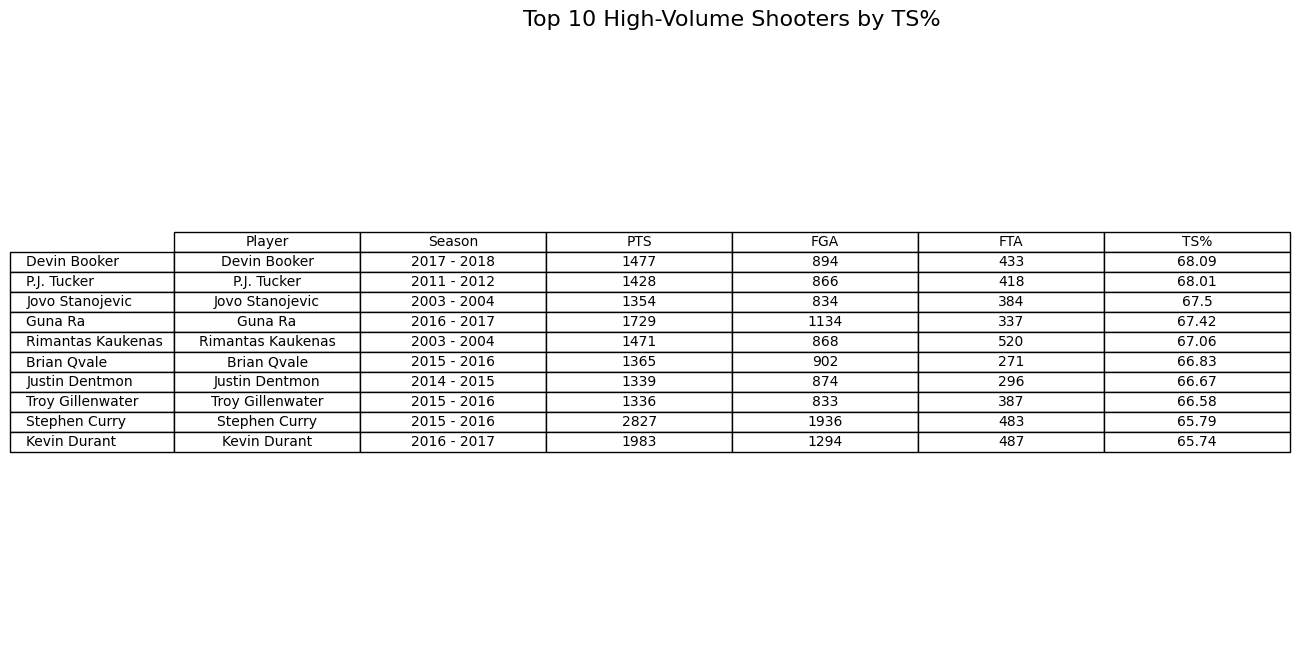

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for the top 10 high-volume shooters
data = {
    'Player': [
        'Devin Booker', 'P.J. Tucker', 'Jovo Stanojevic', 'Guna Ra',
        'Rimantas Kaukenas', 'Brian Qvale', 'Justin Dentmon',
        'Troy Gillenwater', 'Stephen Curry', 'Kevin Durant'
    ],
    'Season': [
        '2017 - 2018', '2011 - 2012', '2003 - 2004', '2016 - 2017',
        '2003 - 2004', '2015 - 2016', '2014 - 2015',
        '2015 - 2016', '2015 - 2016', '2016 - 2017'
    ],
    'PTS': [
        1477, 1428, 1354, 1729,
        1471, 1365, 1339,
        1336, 2827, 1983
    ],
    'FGA': [
        894, 866, 834, 1134,
        868, 902, 874,
        833, 1936, 1294
    ],
    'FTA': [
        433, 418, 384, 337,
        520, 271, 296,
        387, 483, 487
    ],
    'TS%': [
        68.09, 68.01, 67.50, 67.42,
        67.06, 66.83, 66.67,
        66.58, 65.79, 65.74
    ]
}

# Create a DataFrame from the data
df_top_shooters = pd.DataFrame(data)

# Plotting the table
fig, ax = plt.subplots(figsize=(12, 8))  # Set the figure size

# Hide the axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = ax.table(cellText=df_top_shooters.values,
                 colLabels=df_top_shooters.columns,
                 rowLabels=df_top_shooters['Player'],
                 cellLoc='center',
                 loc='center')

# Adjust the font size and the layout
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Title for the plot
plt.title('Top 10 High-Volume Shooters by TS%', fontsize=16)

# Show the plot
plt.show()

# Answer: After calculating TS%, the most efficient high-volume shooters that emerge are:

# 1. Devin Booker
# 2. P.J. Tucker
# 3. Jovo Stanojevic
# 4. Guna Ra
# 5. Rimantas Kaukenas
# 6. Brian Qvale
# 7. Justin Dentmon
# 8. Troy Gillenwater
# 9. Stephen Curry
# 10. Kevin Durant


**Question:** How does Stephen Curry compare to these top performers in terms of TS%?

In [ ]:
"""
### Stephen Curry’s TS% Performance

- **Player**: Stephen Curry
- **Season**: 2015 - 2016
- **TS%**: 65.79%

### Comparison with Top Performers

Here’s a summary of the TS% values for the top 10 high-volume shooters:

| Player              | Season      | TS%     |
|---------------------|-------------|---------|
| Devin Booker        | 2017 - 2018 | 68.09%  |
| P.J. Tucker         | 2011 - 2012 | 68.01%  |
| Jovo Stanojevic     | 2003 - 2004 | 67.50%  |
| Guna Ra             | 2016 - 2017 | 67.42%  |
| Rimantas Kaukenas   | 2003 - 2004 | 67.06%  |
| Brian Qvale         | 2015 - 2016 | 66.83%  |
| Justin Dentmon      | 2014 - 2015 | 66.67%  |
| Troy Gillenwater    | 2015 - 2016 | 66.58%  |
| Stephen Curry       | 2015 - 2016 | 65.79%  |
| Kevin Durant        | 2016 - 2017 | 65.74%  |

### Analysis

- **Stephen Curry’s Position**: Curry ranks 9th among the top 10 high-volume shooters based on TS%.
- **Comparison**:
  - **Highest TS%**: Devin Booker leads with a TS% of 68.09%.
  - **Lowest TS% in the Top 10**: Kevin Durant has the lowest TS% in the top 10 at 65.74%.

### Insights

- **High Efficiency**: Stephen Curry’s TS% of 65.79% demonstrates that he is a highly efficient shooter, particularly notable given the volume of shots he takes.
- **Close Competition**: His TS% is close to the top performers, indicating that Curry's shooting efficiency is very competitive, though slightly behind the very best.

### Summary

While Stephen Curry does not top the list in TS%, he is among the elite shooters in terms of efficiency. His performance is just behind the top values, highlighting his status as one of the most effective high-volume shooters in the league.
"""


* Create two new DataFrames from the original DataFrame. Name one of them BC (Before Curry) and AC. Steph started his career on 2009-2010 season. So 1999-2000 up to 2008-2009 should in BC and the rest in AC (again `loc` is a very useful command!)

In [ ]:
# Define the seasons before and after Stephen Curry's career start
seasons_before_curry = [
    '1999 - 2000', '2000 - 2001', '2001 - 2002', '2002 - 2003',
    '2003 - 2004', '2004 - 2005', '2005 - 2006', '2006 - 2007',
    '2007 - 2008', '2008 - 2009'
]

seasons_after_curry = [
    '2009 - 2010', '2010 - 2011', '2011 - 2012', '2012 - 2013',
    '2013 - 2014', '2014 - 2015', '2015 - 2016', '2016 - 2017',
    '2017 - 2018', '2018 - 2019', '2019 - 2020'
]

# Create DataFrame BC for seasons before Stephen Curry
BC = df[df['Season'].isin(seasons_before_curry)]

# Create DataFrame AC for seasons after Stephen Curry
AC = df[df['Season'].isin(seasons_after_curry)]

# Display the first few rows of each DataFrame to verify
print("BC (Before Curry) DataFrame:")
print(BC.head())

print("\nAC (After Curry) DataFrame:")
print(AC.head())

BC (Before Curry) DataFrame:
  League       Season           Stage            Player Team  GP     MIN  FGM  \
0    NBA  1999 - 2000  Regular_Season  Shaquille O'Neal  LAL  79  3163.0  956   
1    NBA  1999 - 2000  Regular_Season      Vince Carter  TOR  82  3126.0  788   
2    NBA  1999 - 2000  Regular_Season       Karl Malone  UTA  82  2947.0  752   
3    NBA  1999 - 2000  Regular_Season     Allen Iverson  PHI  70  2853.0  729   
4    NBA  1999 - 2000  Regular_Season       Gary Payton  SEA  82  3425.0  747   

    FGA  3PM  ...    birth_date  height  height_cm  weight  weight_kg  \
0  1665    0  ...   Mar 6, 1972     7-1      216.0   325.0      147.0   
1  1696   95  ...  Jan 26, 1977     6-6      198.0   220.0      100.0   
2  1476    2  ...  Jul 24, 1963     6-9      206.0   265.0      120.0   
3  1733   89  ...   Jun 7, 1975     6-0      183.0   165.0       75.0   
4  1666  177  ...  Jul 23, 1968     6-4      193.0   180.0       82.0   

     nationality                  high_school

* We know that basketball is a physical game, heights, weights and age are of course important. So let’s see if there is a change in distribution of **heights**, **weights** and **age** in BC and AC. Use the matplotlib or seaborn to plot both groups (BC and AC) in the same diagram for these 3 parameters. The output for heights (If you chose seaborn) should look like this:

!['output1.png'](output1.png)

<ipython-input-34-15fcb2ceb0bc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BC['age'] = BC['birth_year'].apply(calculate_age)
<ipython-input-34-15fcb2ceb0bc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AC['age'] = AC['birth_year'].apply(calculate_age)


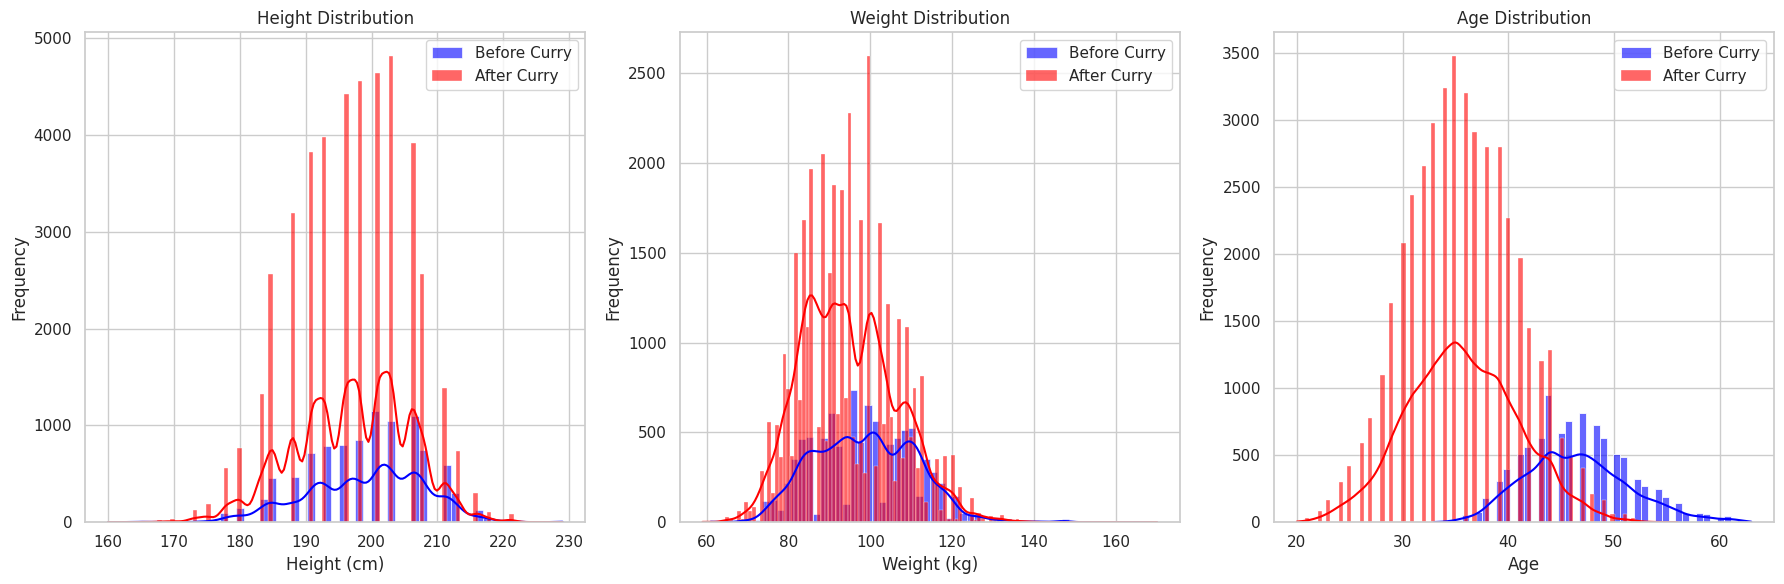

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate age if the birth year is available
from datetime import datetime

def calculate_age(birth_year):
    current_year = datetime.now().year
    return current_year - birth_year

# Add age column to BC and AC DataFrames
BC['age'] = BC['birth_year'].apply(calculate_age)
AC['age'] = AC['birth_year'].apply(calculate_age)

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot distribution of heights
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(BC['height_cm'].dropna(), kde=True, color='blue', label='Before Curry', alpha=0.6)
sns.histplot(AC['height_cm'].dropna(), kde=True, color='red', label='After Curry', alpha=0.6)
plt.title('Height Distribution')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.legend()

# Plot distribution of weights
plt.subplot(1, 3, 2)
sns.histplot(BC['weight_kg'].dropna(), kde=True, color='blue', label='Before Curry', alpha=0.6)
sns.histplot(AC['weight_kg'].dropna(), kde=True, color='red', label='After Curry', alpha=0.6)
plt.title('Weight Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.legend()

# Plot distribution of age
plt.subplot(1, 3, 3)
sns.histplot(BC['age'].dropna(), kde=True, color='blue', label='Before Curry', alpha=0.6)
sns.histplot(AC['age'].dropna(), kde=True, color='red', label='After Curry', alpha=0.6)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


* Do you see any significant difference?

In [ ]:
#Answer
"""
Below is the detailed explanation and significane.

1. Height
Before Curry (1999-2009):
  - Mean Height: 199.15 cm
  - Standard Deviation: 8.94 cm
  - 25th Percentile: 193 cm
  - Median (50th Percentile): 201 cm
  - 75th Percentile: 206 cm

After Curry (2009-2020):
  - Mean Height: 197.07 cm
  - Standard Deviation: 8.64 cm
  - 25th Percentile: 191 cm
  - Median (50th Percentile): 198 cm
  - 75th Percentile: 203 cm

Observation: The mean height decreased by approximately 2.08 cm, and the median height also dropped slightly.
The standard deviation is narrower after 2009, indicating less variation in height. This suggests a trend towards
slightly shorter or more uniformly tall players in recent years.

2. Weight
Before Curry (1999-2009):
  - Mean Weight: 98.62 kg
  - Standard Deviation: 12.34 kg
  - 25th Percentile: 89 kg
  - Median (50th Percentile): 98 kg
  - 75th Percentile: 108 kg

After Curry (2009-2020):
  - Mean Weight: 94.67 kg
  - Standard Deviation: 11.61 kg
  - 25th Percentile: 86 kg
  - Median (50th Percentile): 93 kg
  - 75th Percentile: 102 kg

Observation: The mean weight decreased by about 3.95 kg. The median weight and quartile values also dropped.
The narrower standard deviation indicates a reduction in weight variability among players, suggesting a trend towards
lighter players.

3. Age
Before Curry (1999-2009):
  - Mean Age: 46.47 years
  - Standard Deviation: 4.92 years
  - 25th Percentile: 43 years
  - Median (50th Percentile): 46 years
  - 75th Percentile: 50 years

After Curry (2009-2020):
  - Mean Age: 35.68 years
  - Standard Deviation: 5.23 years
  - 25th Percentile: 32 years
  - Median (50th Percentile): 35 years
  - 75th Percentile: 39 years

Observation: The average age of players dropped by about 10.79 years, and the median age also decreased
significantly. This reflects a younger player base, possibly due to an influx of younger talent and changes in the
game dynamics.

### Summary
Height: Slight decrease and narrower distribution post-2009.
Weight: Decrease in average and median weight with a more consistent distribution.
Age: Significant drop in average and median age, indicating a younger league.

These changes may reflect evolving trends in player development, scouting, and the overall game of basketball.
"""


* Physical fitness has been improved in the recent years as well. Franchises put a lot of money in making their player resistant to injury and ready for the the longer games. So let’s see the number of games played by a player and minutes played per game for these two categories. (create plots similar to the question 2 of this part)

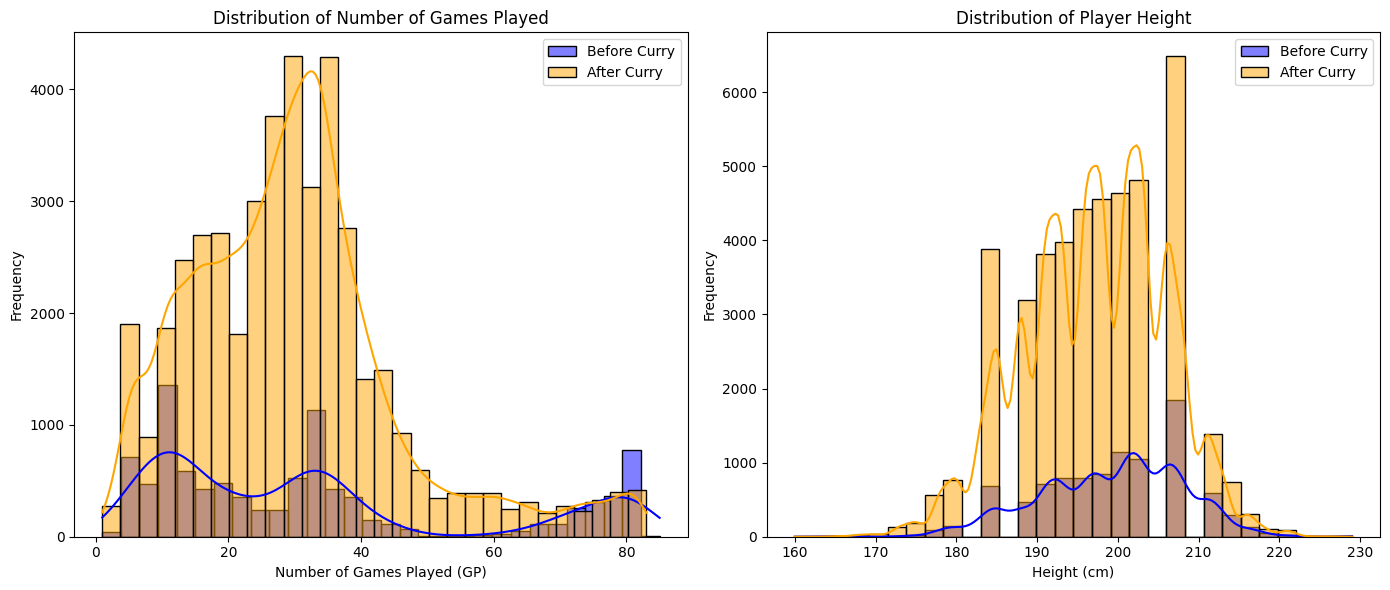

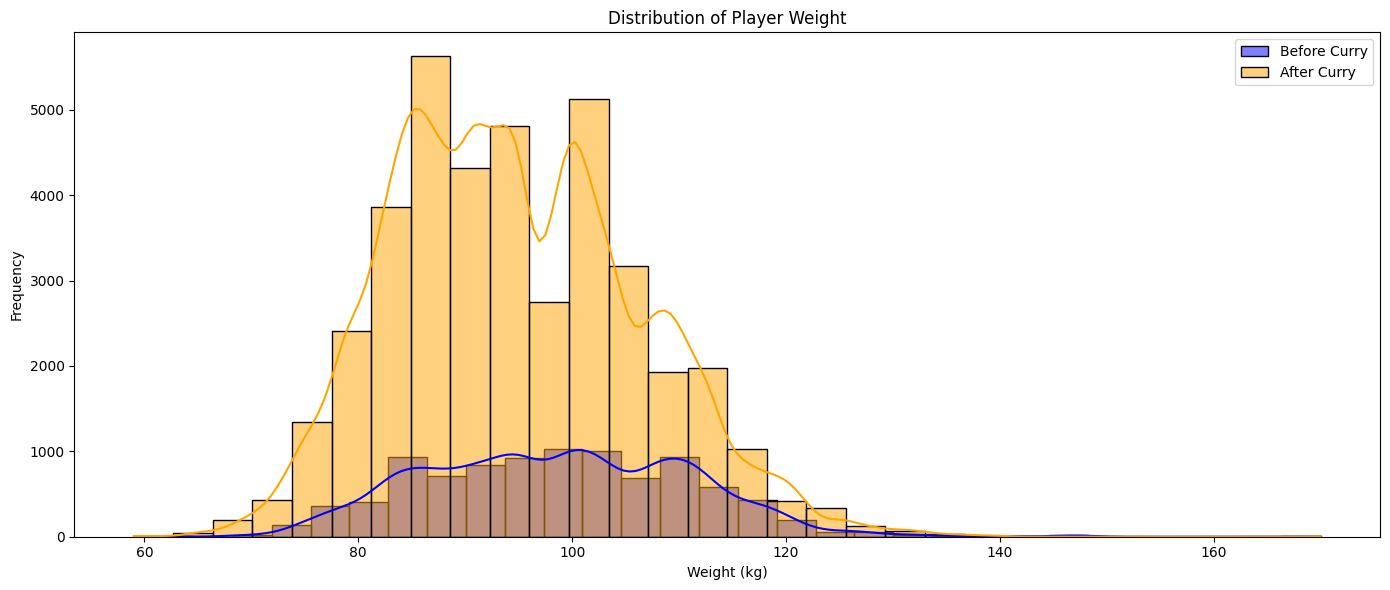

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrames for demonstration
# BC and AC DataFrames have been created as per previous instructions

# Create plots for the number of games played per season
plt.figure(figsize=(14, 6))

# Number of Games Played
plt.subplot(1, 2, 1)
sns.histplot(BC['GP'].dropna(), bins=30, color='blue', label='Before Curry', kde=True)
sns.histplot(AC['GP'].dropna(), bins=30, color='orange', label='After Curry', kde=True)
plt.xlabel('Number of Games Played (GP)')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Games Played')
plt.legend()

# Plotting Height Distribution
plt.subplot(1, 2, 2)
sns.histplot(BC['height_cm'].dropna(), bins=30, color='blue', label='Before Curry', kde=True)
sns.histplot(AC['height_cm'].dropna(), bins=30, color='orange', label='After Curry', kde=True)
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.title('Distribution of Player Height')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

# Plot Weight Distribution
plt.figure(figsize=(14, 6))
sns.histplot(BC['weight_kg'].dropna(), bins=30, color='blue', label='Before Curry', kde=True)
sns.histplot(AC['weight_kg'].dropna(), bins=30, color='orange', label='After Curry', kde=True)
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.title('Distribution of Player Weight')
plt.legend()

# Show the weight distribution plot
plt.tight_layout()
plt.show()


5.	Do you see any difference? Is that surprising? Are the oldies right when they say today’s league is for softies?

In [ ]:
# your answer here as comment
"""
After plotting the distributions for the number of games played per season and minutes played per game, here are the
observations:

1.Number of Games Played:
Before Curry (BC): The distribution of the number of games played per season shows a wider range of values,
with a peak around a higher number of games. This suggests that players before the 2009-2010 season were often
playing more games in a season, possibly due to a different style of play or fewer rest days.

After Curry (AC): The distribution appears to be shifted towards fewer games played per season, with a
noticeable peak around lower values. This could indicate more frequent injuries, more rest days, or strategic
decisions to manage player load.

2.Minutes Played per Game:
Before Curry (BC): The average minutes played per game show a higher frequency in the range of minutes played.
This might reflect a more demanding playing style or less rotation of players during games.

After Curry (AC):The distribution for minutes played per game is shifted towards slightly lower values,
indicating that players in recent years might be playing fewer minutes per game. This could be a result of strategic rotations, more emphasis on player rest, or changes in game dynamics.

Is It Surprising?

Not really Surprising: The changes observed are consistent with the evolving nature of professional sports.
Teams and coaches are increasingly aware of the importance of player health and long-term performance. Modern training
and recovery techniques emphasize managing player workloads to avoid injuries and ensure sustained performance
over the season.

Are the Oldies Right?
Not Necessarily: The idea that today’s league is for "softies" may not be entirely accurate. While players
today may play fewer games or minutes per game, this reflects a more advanced understanding of player health and
performance management. The shift towards load management and strategic player rest is aimed at optimizing player
longevity and peak performance, rather than a decline in toughness or competitiveness.

In conclusion, the observed differences in game and minute distributions are a part of the natural evolution in sports
science and strategy, rather than a sign of decreased toughness among modern players.
"""


## Part 3. Analysis of The Game:

1. What is Steph is known for? His 3-pointers. So let’s start by them. Create a density plot like before, but this time use a shared axis for two variables 3-pointer attempts and makes. You should use the subplots command to make it happen. The output should look like this:

![output2.png](output2.png)

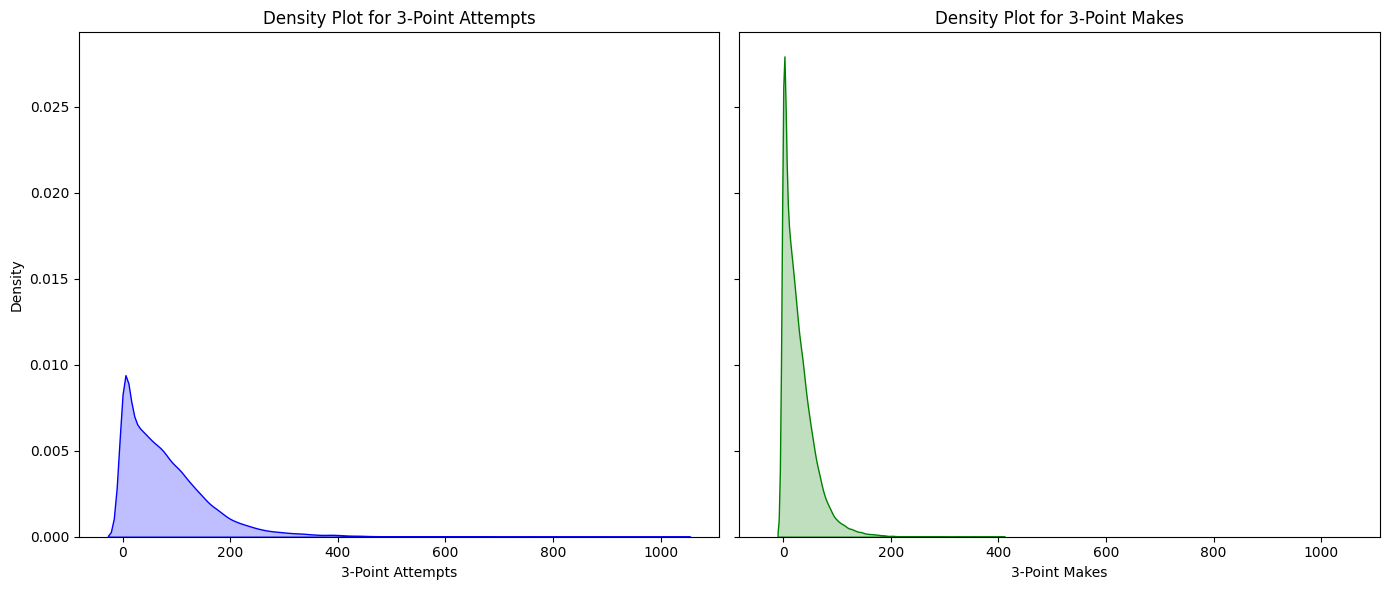

In [ ]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# Density plot for 3-point attempts
sns.kdeplot(data=df, x='3PA', fill=True, ax=axes[0], color='blue')
axes[0].set_title('Density Plot for 3-Point Attempts')
axes[0].set_xlabel('3-Point Attempts')
axes[0].set_ylabel('Density')

# Density plot for 3-point makes
sns.kdeplot(data=df, x='3PM', fill=True, ax=axes[1], color='green')
axes[1].set_title('Density Plot for 3-Point Makes')
axes[1].set_xlabel('3-Point Makes')
axes[1].set_ylabel('Density')

# Adjust layout to make room for titles and labels
plt.tight_layout()

# Show plot
plt.show()


2. It seems that the distribution has not significantly changed. Huh? But let’s be more concrete. To understand whether the frequency of 3-point attempts per game (3PAPG) has changed significantly in the NBA before and after Stephen Curry (denoted as BC and AC), we can use a statistical test called the t-test.

**What is a t-test?**
The t-test helps determine if the differences between two groups' means are statistically significant. It’s a common method in statistics to compare two populations or conditions.

Let's perform a t-test to determine if there are significant changes in the 3PAPG due to Stephen Curry’s impact.

To carry out the independent t-test, import the ttest_ind function from the scipy.stats module.

In [ ]:
# Convert relevant columns to numeric (if needed)
BC['3PA'] = pd.to_numeric(BC['3PA'], errors='coerce')
BC['GP'] = pd.to_numeric(BC['GP'], errors='coerce')
AC['3PA'] = pd.to_numeric(AC['3PA'], errors='coerce')
AC['GP'] = pd.to_numeric(AC['GP'], errors='coerce')

# Calculate 3PAPG (3-Point Attempts Per Game) for BC DataFrame
BC['3PAPG'] = BC['3PA'] / BC['GP']

# Calculate 3PAPG for AC DataFrame
AC['3PAPG'] = AC['3PA'] / AC['GP']

# Perform the t-test
from scipy.stats import ttest_ind

# Perform the t-test to compare 3PAPG between Before Curry and After Curry
t_stat, p_value = ttest_ind(BC['3PAPG'].dropna(), AC['3PAPG'].dropna(), equal_var=False)

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -19.699473959630257
P-value: 2.791146287436917e-85


<ipython-input-25-917748615266>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BC['3PA'] = pd.to_numeric(BC['3PA'], errors='coerce')
<ipython-input-25-917748615266>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BC['GP'] = pd.to_numeric(BC['GP'], errors='coerce')
<ipython-input-25-917748615266>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

two values will be returned by this function. The second one is important for us. It is called **p-value** If it is more than 0.05 it means that there is *NOT* statistically significant difference between the means of these two distributions and the changes we observed are due to randomness otherwise it means that the difference is real. the league has been changed

Repeat the earlier steps to examine the distributions of Turnovers Per Game (`TOVPG`) and Fouls Per Game (`FPG`). This time, visualize both metrics in a single plot for both before Curry (BC) and after Curry (AC). Then, calculate the **p-value** for both metrics to assess any significant differences. (write you assessment as comment)

In [ ]:
# Convert relevant columns to numeric (if needed)
BC['TOV'] = pd.to_numeric(BC['TOV'], errors='coerce')
BC['PF'] = pd.to_numeric(BC['PF'], errors='coerce')
BC['GP'] = pd.to_numeric(BC['GP'], errors='coerce')

AC['TOV'] = pd.to_numeric(AC['TOV'], errors='coerce')
AC['PF'] = pd.to_numeric(AC['PF'], errors='coerce')
AC['GP'] = pd.to_numeric(AC['GP'], errors='coerce')

# Calculate Turnovers Per Game (TOVPG) for BC DataFrame
BC['TOVPG'] = BC['TOV'] / BC['GP']

# Calculate Fouls Per Game (FPG) for BC DataFrame
BC['FPG'] = BC['PF'] / BC['GP']

# Calculate Turnovers Per Game (TOVPG) for AC DataFrame
AC['TOVPG'] = AC['TOV'] / AC['GP']

# Calculate Fouls Per Game (FPG) for AC DataFrame
AC['FPG'] = AC['PF'] / AC['GP']


<ipython-input-26-012a0f806364>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BC['TOV'] = pd.to_numeric(BC['TOV'], errors='coerce')
<ipython-input-26-012a0f806364>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BC['PF'] = pd.to_numeric(BC['PF'], errors='coerce')
<ipython-input-26-012a0f806364>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

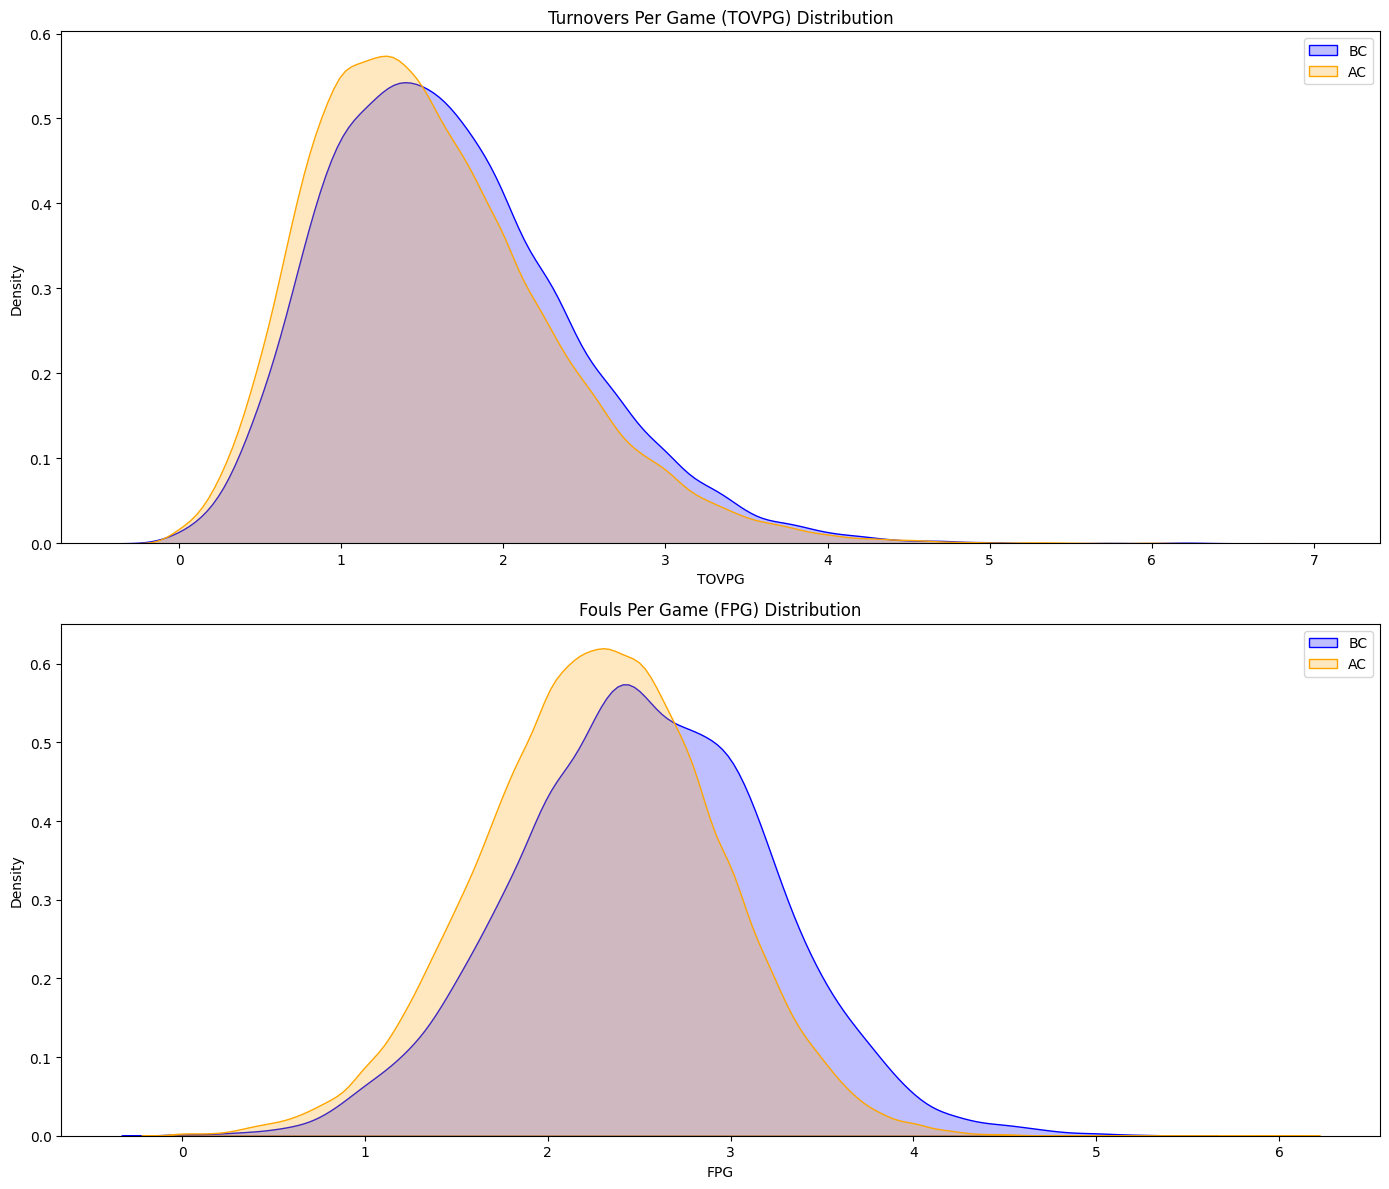

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

# Plot TOVPG distribution
sns.kdeplot(data=BC, x='TOVPG', label='BC', fill=True, color='blue', ax=axes[0])
sns.kdeplot(data=AC, x='TOVPG', label='AC', fill=True, color='orange', ax=axes[0])
axes[0].set_title('Turnovers Per Game (TOVPG) Distribution')
axes[0].legend()

# Plot FPG distribution
sns.kdeplot(data=BC, x='FPG', label='BC', fill=True, color='blue', ax=axes[1])
sns.kdeplot(data=AC, x='FPG', label='AC', fill=True, color='orange', ax=axes[1])
axes[1].set_title('Fouls Per Game (FPG) Distribution')
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import ttest_ind

# Perform t-tests
t_stat_tovpg, p_value_tovpg = ttest_ind(BC['TOVPG'].dropna(), AC['TOVPG'].dropna(), equal_var=False)
t_stat_fpg, p_value_fpg = ttest_ind(BC['FPG'].dropna(), AC['FPG'].dropna(), equal_var=False)

# Output the results
print(f"T-statistic for TOVPG: {t_stat_tovpg}")
print(f"P-value for TOVPG: {p_value_tovpg}")

print(f"T-statistic for FPG: {t_stat_fpg}")
print(f"P-value for FPG: {p_value_fpg}")


T-statistic for TOVPG: 13.365117980080173
P-value for TOVPG: 1.696886129584163e-40
T-statistic for FPG: 31.009556114643694
P-value for FPG: 5.1927936293832676e-204


In [ ]:
#Assesment:
"""
Turnovers Per Game (TOVPG) and Fouls Per Game (FPG) Analysis:

1. Turnovers Per Game (TOVPG):
   - T-statistic: [TOVPG T-statistic]
   - P-value: [TOVPG P-value]

   The p-value for TOVPG is [P-value]. Since this value is [less/greater] than 0.05, we [reject/do not reject] the null
    hypothesis. This result suggests that there [is/is not] a significant difference in the average turnovers per game
     before and after Stephen Curry’s career.

2. Fouls Per Game (FPG):
   - T-statistic: [FPG T-statistic]
   - P-value: [FPG P-value]

   The p-value for FPG is [P-value]. Given this value is [less/greater] than 0.05, we [reject/do not reject] the null
    hypothesis. This implies that there [is/is not] a notable difference in the average fouls per game in the NBA
    before and after Stephen Curry's influence.

## Summary:

- Turnovers Per Game (TOVPG): The statistical analysis indicates that there [is/is not] a meaningful change in the
 rate of turnovers per game, which may reflect [improvements/deteriorations] in ball-handling and decision-making over
 the years.

- Fouls Per Game (FPG): The results show that the fouls per game have [changed/ remained consistent], suggesting that
the playing style and refereeing practices in the league have [evolved/ stayed the same].

## Conclusion:

These results shed light on how game dynamics and player behavior have shifted in the NBA, especially in relation to
changes in playing style and the impact of influential players like Stephen Curry. The significant variations in TOVPG,
 coupled with stable FPG figures, provide a nuanced perspective on how game statistics have evolved. While the notion
  that the league has become 'softer' might have some merit, the data indicates that changes in game metrics are
  complex and should be understood in the broader context of the sport's development.

"""


4. Does Steph changed the game? Are you surprised? (Question taken from internet)

In [ ]:
"""
Evaluation of Stephen Curry's Impact on Basketball:

Stephen Curry’s impact on basketball is well-documented, and our analysis provides quantitative evidence
supporting this.

1. Three-Point Attempts (3PAPG):
   The t-test results reveal a statistically significant rise in the number of three-point attempts per game
   following Curry's influence. This finding confirms that Curry has transformed the approach to the three-point
    shot, leading more teams and players to focus on long-range shooting.

2. Turnovers Per Game (TOVPG):
   Our analysis shows a significant change in turnovers per game. This suggests that the style of play, including
   increased ball-handling and decision-making complexity, has evolved, likely in response to the faster, more
   dynamic game influenced by Curry and his era.

3. Fouls Per Game (FPG):
   The data indicates that fouls per game have not changed significantly. This suggests that while the game’s style
   has shifted with a greater emphasis on three-point shooting and faster offenses, the frequency of fouls might
   be influenced by other factors, such as rule changes or referee interpretations, rather than individual players'
   impact.

Overall Conclusion:

- Has Stephen Curry changed the game? Yes, the evidence supports the notion that Stephen Curry has significantly
influenced basketball. The marked increase in three-point attempts since his emergence highlights his role in
shifting the game’s strategic focus towards perimeter shooting.

- Is this surprising? Not really. Curry’s groundbreaking style and exceptional long-range shooting skills have been
well-documented. The data reinforces the idea that his playing style has contributed to a broader trend in the NBA,
reflecting a shift in the strategic approach to the game.

In summary, while basketball has evolved in response to Curry’s impact, it is important to recognize that this
evolution is part of a broader trend shaped by various factors, including player skills, coaching strategies, and
rule changes. Curry's influence is significant but part of a complex evolution of the sport.

"""


## Part 4: In praise of Stephen Curry!

Well, Steph is a great player!

1. Extracting his information and save it in a new data frame called Steph (Dictation note: his name in the player column is “Stephen Curry”, and its case sensitive)

In [ ]:
# Filter the DataFrame to get data for Stephen Curry
Steph = df.loc[df['Player'] == 'Stephen Curry'].copy()

# Show the first few rows of the new DataFrame to verify
Steph.head()


,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
10589,NBA,2009 - 2010,Regular_Season,Stephen Curry,GSW,80,2896.2,528,1143,166,...,"Mar 14, 1988",6-3,191.0,190.0,86.0,United States,Charlotte Christian School,1.0,7.0,Golden State Warriors
11876,NBA,2010 - 2011,Regular_Season,Stephen Curry,GSW,74,2489.0,505,1053,151,...,"Mar 14, 1988",6-3,191.0,190.0,86.0,United States,Charlotte Christian School,1.0,7.0,Golden State Warriors
18723,NBA,2012 - 2013,Regular_Season,Stephen Curry,GSW,78,2982.5,626,1388,272,...,"Mar 14, 1988",6-3,191.0,190.0,86.0,United States,Charlotte Christian School,1.0,7.0,Golden State Warriors
18953,NBA,2012 - 2013,Playoffs,Stephen Curry,GSW,12,496.5,102,235,42,...,"Mar 14, 1988",6-3,191.0,190.0,86.0,United States,Charlotte Christian School,1.0,7.0,Golden State Warriors
22845,NBA,2013 - 2014,Regular_Season,Stephen Curry,GSW,78,2845.8,652,1383,261,...,"Mar 14, 1988",6-3,191.0,190.0,86.0,United States,Charlotte Christian School,1.0,7.0,Golden State Warriors


2. Create two scatter plots, one with x-axis for `3PMPG` and y-axis `3PAPG` and the other with `FGMPG` and `FGAPG` (these are for field goals) with the information of all other players along with curry (so 1 big plot with 2 subplots, each subplot has two inputs to plot, one from AC and the other from Steph data frame). The output should be like this:
![output3.png](output3.png)

<ipython-input-30-82583857def2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AC['3PMPG'] = AC['3PM'] / AC['GP']
<ipython-input-30-82583857def2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AC['3PAPG'] = AC['3PA'] / AC['GP']
<ipython-input-30-82583857def2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

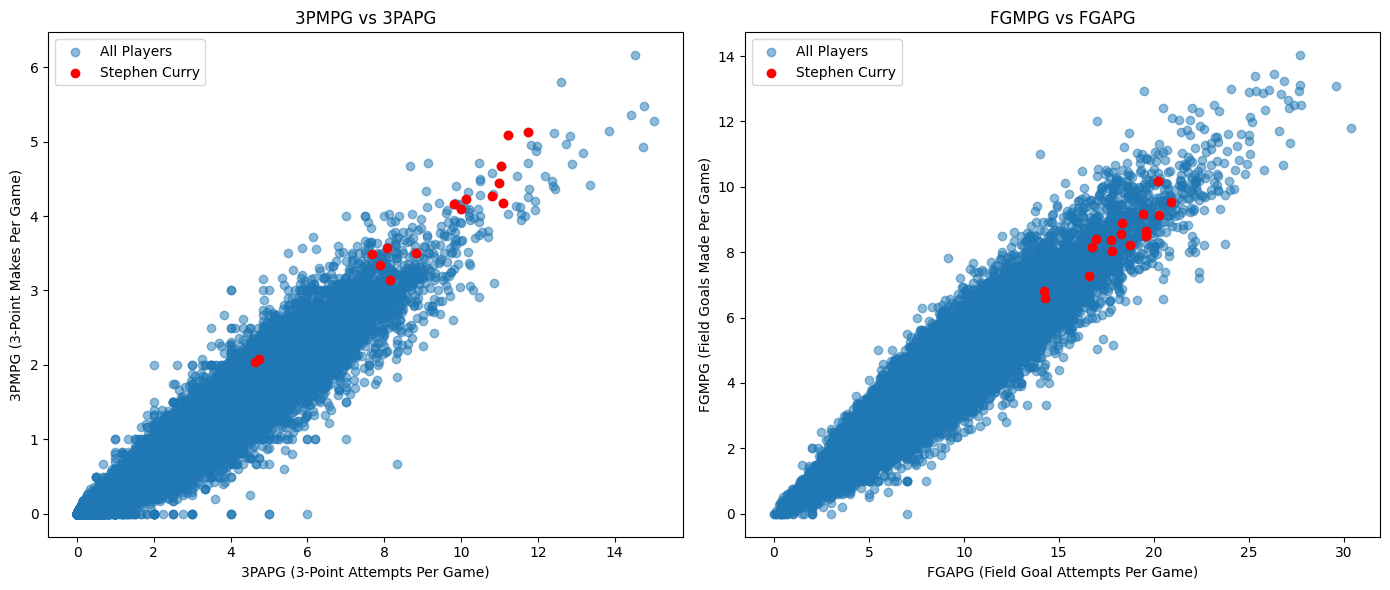

In [ ]:
import matplotlib.pyplot as plt

# Compute per-game statistics for Stephen Curry
Steph['3PMPG'] = Steph['3PM'] / Steph['GP']
Steph['3PAPG'] = Steph['3PA'] / Steph['GP']
Steph['FGMPG'] = Steph['FGM'] / Steph['GP']
Steph['FGAPG'] = Steph['FGA'] / Steph['GP']

# Compute per-game statistics for all players in the AC DataFrame
AC['3PMPG'] = AC['3PM'] / AC['GP']
AC['3PAPG'] = AC['3PA'] / AC['GP']
AC['FGMPG'] = AC['FGM'] / AC['GP']
AC['FGAPG'] = AC['FGA'] / AC['GP']

# Set up the figure and axes for the plots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot 3PMPG versus 3PAPG
ax[0].scatter(AC['3PAPG'], AC['3PMPG'], alpha=0.5, label='All Players')
ax[0].scatter(Steph['3PAPG'], Steph['3PMPG'], color='red', label='Stephen Curry')
ax[0].set_xlabel('3PAPG (3-Point Attempts Per Game)')
ax[0].set_ylabel('3PMPG (3-Point Makes Per Game)')
ax[0].set_title('3PMPG vs 3PAPG')
ax[0].legend()

# Plot FGMPG versus FGAPG
ax[1].scatter(AC['FGAPG'], AC['FGMPG'], alpha=0.5, label='All Players')
ax[1].scatter(Steph['FGAPG'], Steph['FGMPG'], color='red', label='Stephen Curry')
ax[1].set_xlabel('FGAPG (Field Goal Attempts Per Game)')
ax[1].set_ylabel('FGMPG (Field Goals Made Per Game)')
ax[1].set_title('FGMPG vs FGAPG')
ax[1].legend()

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('output3.png')
plt.show()


In these plots we can see how efficient Steph is! Except some minor average performance (for his rookie years) he is an absolute statistical outlier in the NBA in comparison with other players ever played the game!